In [1]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from robustness.tools.label_maps import CLASS_DICT
import os
import sys

sys.path.append('../src')
import pandas as pd
import numpy as np

In [2]:
sns.set()
# sns.set(style='ticks', font='sans-serif', font_scale=1.5)
sns.set(style='ticks', font='sans-serif')
plt.style.use('ggplot')

In [3]:
patch_size = 16
folder_name = "patch_16_0_0_0"
skip_factor = 2
SIZE = 'SMALL'

In [4]:
out_dir = os.path.join("plots", folder_name, SIZE)
os.makedirs(out_dir, exist_ok=True)
os.makedirs(os.path.join(out_dir, 'barplots'), exist_ok=True)

In [5]:
num_patches = 224//patch_size
total_patches = num_patches*num_patches + 1
patch_axis = np.arange(0, total_patches , skip_factor)
root = os.path.join('/mnt/nfs/home/saachij/src/CausalDomainTransfer/patch_ablation/missingness_results', folder_name)

resnet_name = 'ResNet-50'
deit_name = 'ViT-S'
miss_deit_name = 'ViT-S Miss'
MODEL_NAMES = [
#  'deit_small_resnet_aug',
 'resnet50',
 'deit_small_resnet_aug_missingness',
#  'deit_small_patch16_224_.25',
#  'resnet50_.25',
#  'deit_small_patch16_224_.25_missingness',
#  'deit_small_patch16_224_.5',
 'resnet50_.5',
 'deit_small_patch16_224_.5_missingness',
#  'deit_small_patch16_224_.75',
#  'resnet50_.75',
#  'deit_small_patch16_224_.75_missingness'
]
mapping_name_ = {'resnet50': 'ResNet-50',
     'deit_small_resnet_aug': 'ViT-S',
     'deit_small_resnet_aug_missingness': 'ViT-S Miss',
     'deit_small_patch16_224_.25': 'ViT-S .25',
     'resnet50_.25': 'ResNet-50 .25',
     'deit_small_patch16_224_.25_missingness': 'ViT-S Miss .25',
     'deit_small_patch16_224_.5': 'ViT-S .5',
     'resnet50_.5': 'ResNet-50 .5',
     'deit_small_patch16_224_.5_missingness': 'ViT-S Miss .5',
     'deit_small_patch16_224_.75': 'ViT-S .75',
     'resnet50_.75': 'ResNet-50 .75',
     'deit_small_patch16_224_.75_missingness': 'ViT-S Miss .75'
}
COLORS = {'resnet50': 'red',
     'deit_small_resnet_aug': 'green',
     'deit_small_resnet_aug_missingness': 'blue',
     'deit_small_patch16_224_.25': 'green',
     'resnet50_.25': 'red',
     'deit_small_patch16_224_.25_missingness': 'blue',
     'deit_small_patch16_224_.5': 'green',
     'resnet50_.5': 'red',
     'deit_small_patch16_224_.5_missingness': 'blue',
     'deit_small_patch16_224_.75': 'green',
     'resnet50_.75': 'red',
     'deit_small_patch16_224_.75_missingness': 'blue'
}

STYLES = {'resnet50': '-',
     'deit_small_resnet_aug': '-',
     'deit_small_resnet_aug_missingness': '-',
     'deit_small_patch16_224_.25': '--',
     'resnet50_.25': '--',
     'deit_small_patch16_224_.25_missingness': '--',
     'deit_small_patch16_224_.5': '--',
     'resnet50_.5': '--',
     'deit_small_patch16_224_.5_missingness': '--',
     'deit_small_patch16_224_.75': ':',
     'resnet50_.75': ':',
     'deit_small_patch16_224_.75_missingness': ':'
}

METHODS = [
    ('random', 'Random'),
#     ('Saliency', 'Most Salient First'),
#     ('Saliency_reverse', 'Least Salient First'),
]
root_dirs = {}
for model_name in MODEL_NAMES:
    root_dirs[model_name] = os.path.join(root, model_name)

In [6]:
all_out_dicts = {}
for model_name in MODEL_NAMES:
    root_dir = root_dirs[model_name]
    label_map = CLASS_DICT['ImageNet']
    import pickle as pkl
    with open(os.path.join(root_dir, 'envelope.pkl'), 'rb') as f:
        out = pkl.load(f)
        all_out_dicts[model_name] = out

In [7]:
all_out_dicts.keys()

dict_keys(['resnet50', 'deit_small_resnet_aug_missingness', 'resnet50_.5', 'deit_small_patch16_224_.5_missingness'])

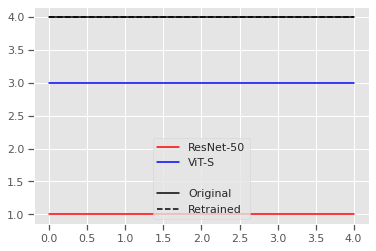

In [8]:
def get_handles():
    fig, ax = plt.subplots(1, 1)
    dummy_x = np.arange(5)
    dummy_y = np.ones(5)
    sns.lineplot(x=dummy_x, y=dummy_y, color='red', linestyle='-', label="ResNet-50", ax=ax)
#     sns.lineplot(x=dummy_x, y=dummy_y+1, color='blue', linestyle='-', label="ViT-S", ax=ax)
    sns.lineplot(x=dummy_x, y=dummy_y+2, color='blue', linestyle='-', label="ViT-S", ax=ax)
    ax.plot(np.NaN, np.NaN, '-', color='none', label=' ')

#     ax.plot(np.NaN, np.NaN, '-', color='none', label='% Removed during Training')
    sns.lineplot(x=dummy_x, y=dummy_y+3, color='black', linestyle='-', label='Original', ax=ax)
#     sns.lineplot(x=dummy_x, y=dummy_y+3, color='black', linestyle='--', label='25%', ax=ax)
    sns.lineplot(x=dummy_x, y=dummy_y+3, color='black', linestyle='--', label='Retrained', ax=ax)
#     sns.lineplot(x=dummy_x, y=dummy_y+3, color='black', linestyle=':', label='75%', ax=ax)

    
#     ax.plot(np.NaN, np.NaN, '-', color='none', label=' ')
#     sns.lineplot(x=dummy_x, y=dummy_y+2, color='black', linestyle=':', label=aug_name, ax=ax)
#     sns.lineplot(x=dummy_x, y=dummy_y+3, color='black', linestyle='-', label=no_aug_name, ax=ax)

    handles, labels = ax.get_legend_handles_labels()
    plt.show()
    return handles, labels
handles, labels = get_handles()
# print(handles[0].__dict__)

# Entropy and Envelope Plots

In [9]:
# ENTROPY CALCULATIONS
def get_entropy(count_vec):
    tot = sum(count_vec)
    preds = count_vec/tot
    entropy = -sum(preds * np.log(preds))
    return entropy

def get_entropies_and_counts(out_dict):
    preds = out_dict['mask_preds']
    all_counts, all_entropies = {}, {}
    for method in preds.keys():
        entropies, counts = [], []
        for i in range(len(np.arange(0, total_patches, skip_factor))):
            labels_in_cls = {}
            predicted_labels = preds[method][i].numpy()
            for l in predicted_labels:
                if l not in labels_in_cls:
                    label_name = label_map[l].split(",")[0]
                    labels_in_cls[l] = [label_name, 1]
                else:
                    labels_in_cls[l][1] += 1
            out = sorted([(count, name) for name, count in labels_in_cls.values()])[::-1]
            counts.append(out)
            entropies.append(get_entropy(np.array([r[0] for r in out])))
        all_counts[method] = counts
        all_entropies[method] = entropies
    return all_entropies, all_counts

def get_envelope(out_dict):
    accs, soft_accs = out_dict['mask_accs'], out_dict['mask_soft_labels']
    df = pd.DataFrame()
    all_accuracies = {}
    for m in accs.keys():
        acc_mat = accs[m]
        mean_acc = torch.mean(acc_mat.float(), -1)
        all_accuracies[m] = mean_acc.numpy()
    all_soft_accuracies = {}
    for m in accs.keys():
        soft_mat = soft_accs[m]
        mean_score = torch.mean(soft_mat.float(), -1)
        all_soft_accuracies[m] = mean_score.numpy()
    return all_accuracies, all_soft_accuracies

In [10]:
model_counts, model_entropies, model_accuracies, model_soft_accuracies = {}, {}, {}, {}
for model_name, out_dict in all_out_dicts.items():
    model_entropies[model_name], model_counts[model_name] = get_entropies_and_counts(out_dict)
    model_accuracies[model_name], model_soft_accuracies[model_name] = get_envelope(out_dict)
    

In [13]:
FONT_SIZE=18

In [22]:
# plot entropy
def patch_plots(result_dict, x_label, y_label, filename):
    fig, ax = plt.subplots(1, len(METHODS),figsize=(9*len(METHODS), 7))
    if len(METHODS) == 1:
        ax = [ax]
    for i, (method, method_name) in enumerate(METHODS):
        for model in MODEL_NAMES:
            label_name =mapping_name_[model]
            print(len(patch_axis), len(result_dict[model][method]))
            sns.lineplot(x=patch_axis,
                         y=result_dict[model][method], 
                         ax=ax[i],
                         linewidth=2,
                         color=COLORS[model],
                         linestyle=STYLES[model],
                         label=label_name)
                
#             sns.lineplot(x=patch_axis,
#                          y=result_dict[model][method], 
#                          ax=ax[i],
#                          color=COLORS[mapping_name_[model][0]],
#                          linestyle=STYLES[mapping_name_[model][1]],
#                          linewidth=2,
#                          label=label_name)
        if len(METHODS) > 1:
            ax[i].set_title(method_name, fontsize=FONT_SIZE)
        ax[i].set_ylabel(y_label, fontsize=FONT_SIZE)
        ax[i].set_xlabel(x_label, fontsize=FONT_SIZE)
        if i !=len(METHODS) - 1:
            ax[i].legend([],[], frameon=False)
        else:
            ax[i].legend(handles,labels, frameon=True, fontsize=FONT_SIZE, loc='lower left')
        ax[i].tick_params(axis='x', labelsize=FONT_SIZE)
        ax[i].tick_params(axis='y', labelsize=FONT_SIZE)
    fig.savefig(filename, bbox_inches='tight')
    plt.show()


99 99
99 99
99 99
99 99


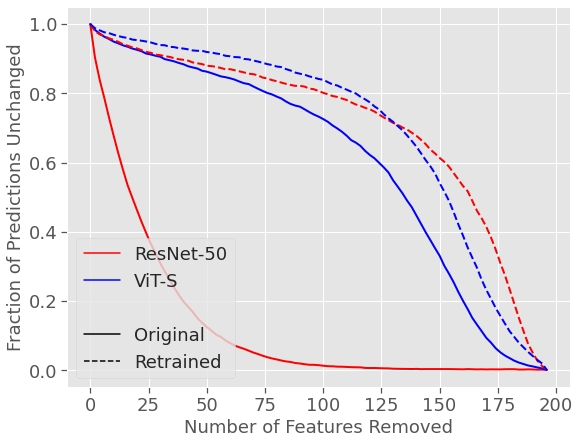

In [23]:
patch_plots(model_accuracies, 
            "Number of Features Removed", 
            "Fraction of Predictions Unchanged",
             "retrain_envelope.pdf")

In [44]:
all_out_dicts['deit_small_patch16_224_.25_missingness']['mask_soft_labels']['random']

tensor([[0.4756, 0.9885, 0.9916,  ..., 0.9787, 0.2972, 0.4386],
        [0.4756, 0.9885, 0.9916,  ..., 0.9787, 0.2972, 0.4386],
        [0.4756, 0.9885, 0.9916,  ..., 0.9787, 0.2972, 0.4386],
        ...,
        [0.4756, 0.9885, 0.9916,  ..., 0.9787, 0.2972, 0.4386],
        [0.4756, 0.9885, 0.9916,  ..., 0.9787, 0.2972, 0.4386],
        [0.4756, 0.9885, 0.9916,  ..., 0.9787, 0.2972, 0.4386]])

In [31]:
def make_bar_plot(model_counts, model_name, method, filename):
    all_cts = model_counts[model_name][method]
    mid_index = patch_axis.tolist().index((total_patches - 1)//2)
    mid_cts = all_cts[mid_index]
    first_cts = all_cts[0]
    total_cts = sum([u[0] for u in mid_cts])
    first_cts_map = {u[1]: u[0]/total_cts for u in first_cts}
    mid_cts_map = {u[1]: u[0]/total_cts for u in mid_cts}
    normalized_cts = [(mid_cts_map[l],first_cts_map[l], l) for  _, l in mid_cts]

    key_name = 'Tokens Removed' if 'missingness' in model_name else 'Blacked Out'
    df = pd.DataFrame(normalized_cts[:50], columns=[f"50% {key_name}", f"0% {key_name}",'Label Name'])
    df = df.melt('Label Name')
    fig, ax = plt.subplots(1, 1, figsize=(20, 3))
    g = sns.barplot(data=df, x='Label Name', y='value', hue='variable', ax=ax)
    g.set_xticklabels(g.get_xticklabels(), rotation=45, size=16, horizontalalignment='right')
    ax.set_ylabel('Fraction of Predictions', fontsize=15)
    ax.set_xlabel('')
    ax.set_yscale('log')
    ax.set_ylim(1e-4, 0.5)
    ax.axhline(1/1000.0, color='gray', label='Uniform', linewidth=2, linestyle='-')
    ax.set_title(mapping_name_[model_name][0])
    plt.legend()
    fig.savefig(filename, bbox_inches='tight')
    plt.show()

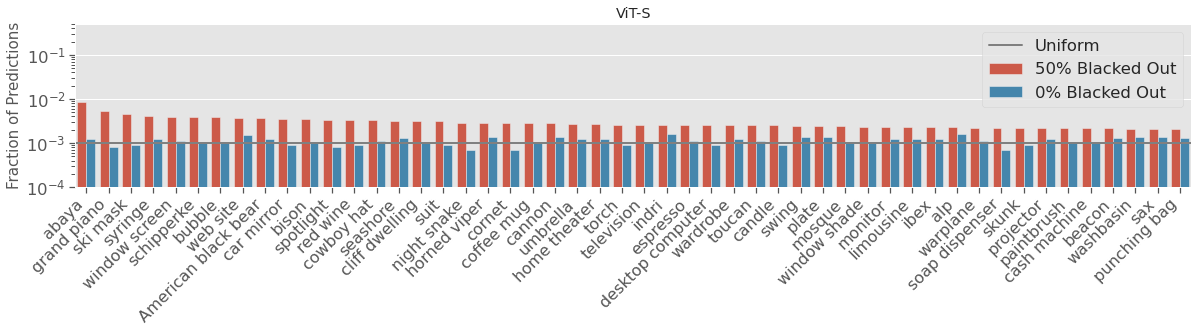

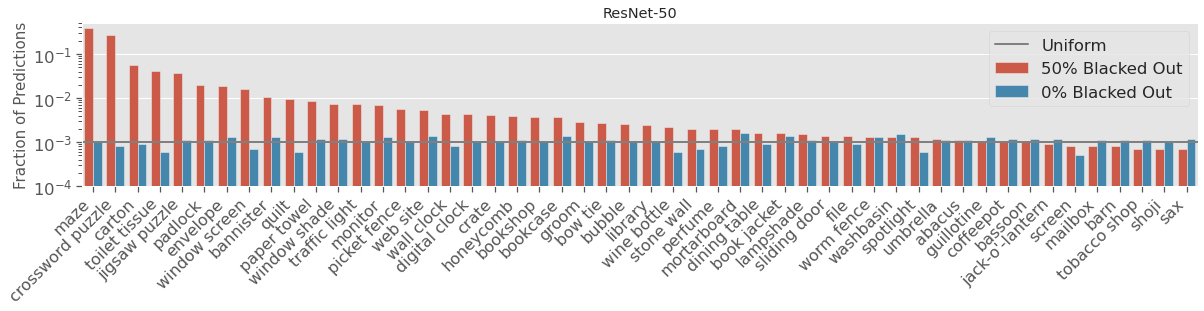

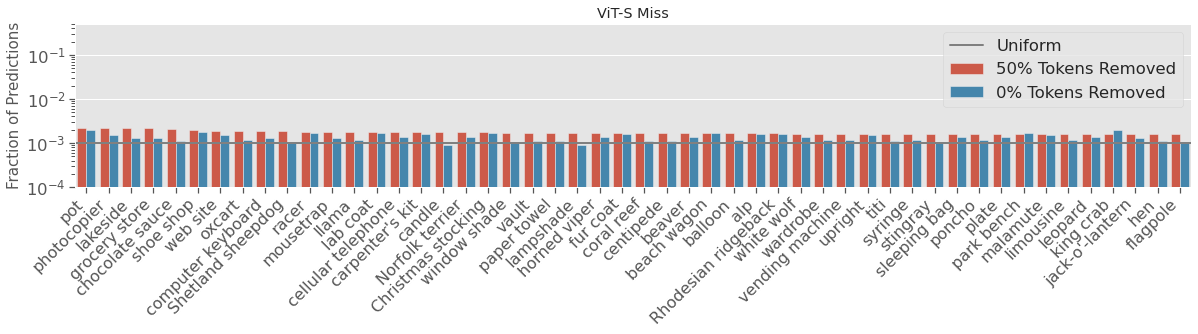

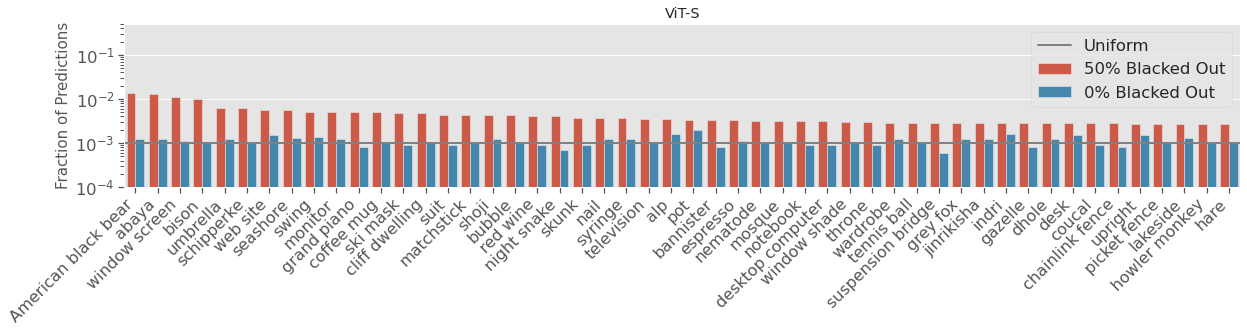

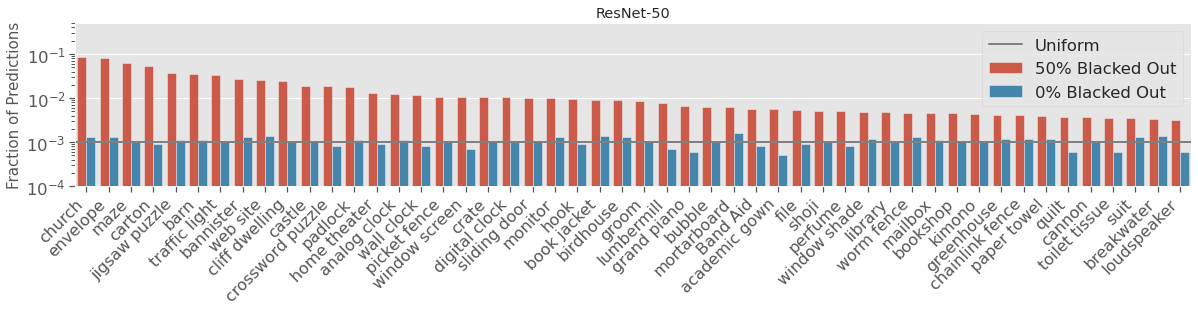

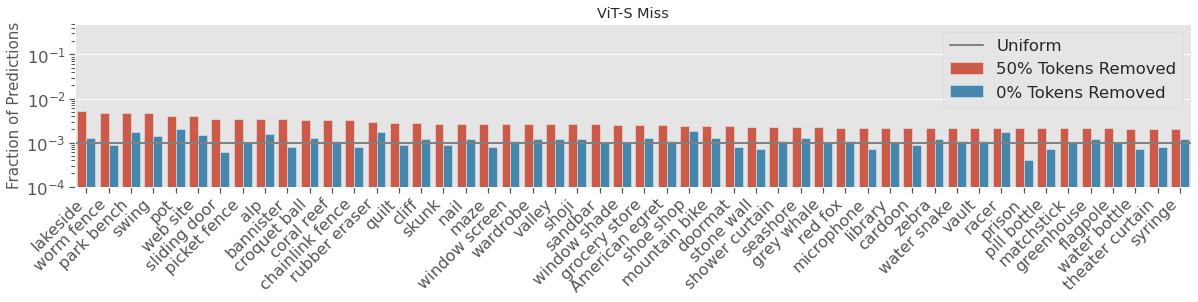

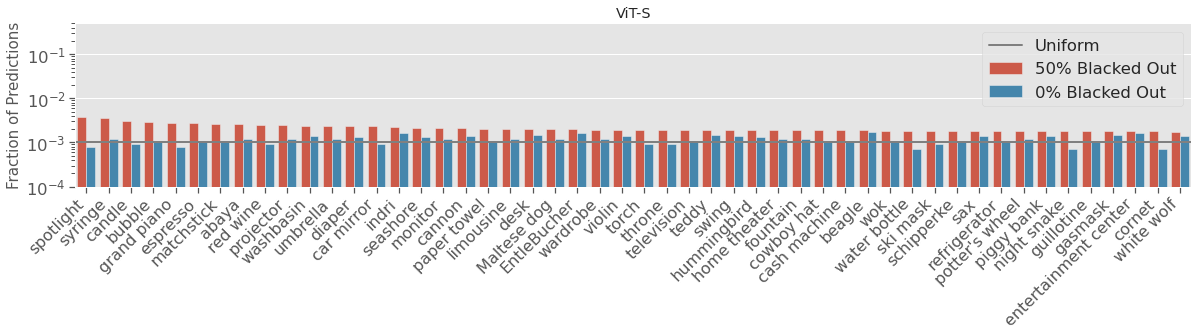

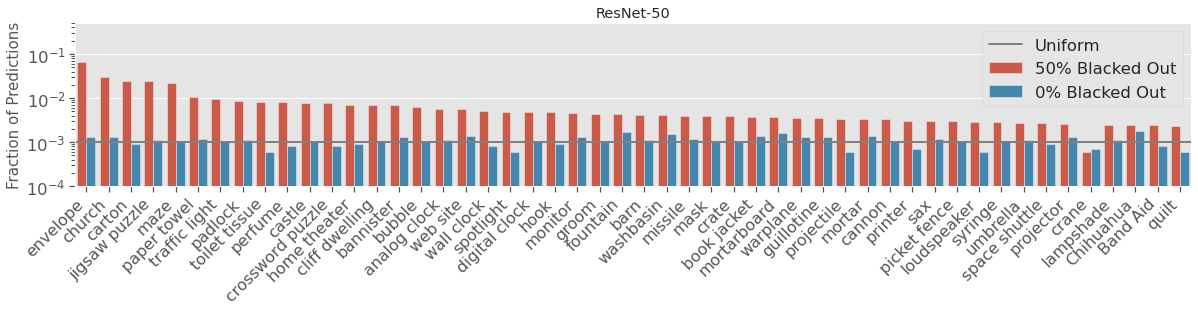

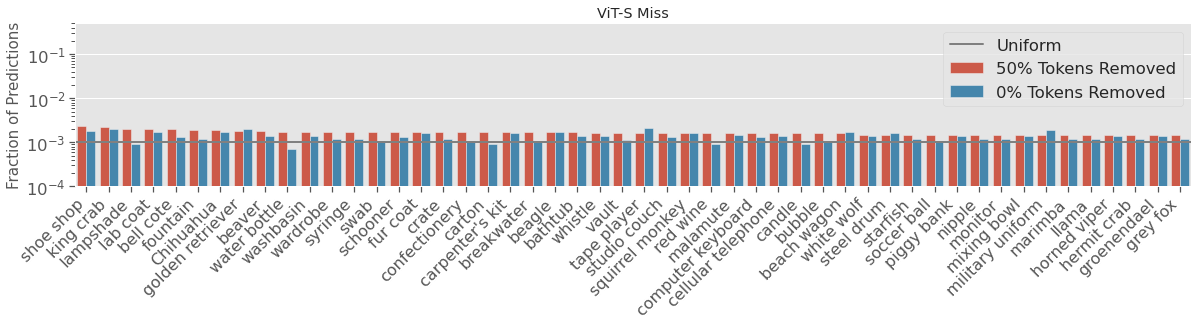

In [32]:
for method, _ in METHODS:
    for model in MODEL_NAMES:
        make_bar_plot(model_counts, 
                      model,
                      method,
                      os.path.join(out_dir, 'barplots', f"{method}_{model}.pdf"))

## WordNet

In [19]:
import nltk
from nltk.corpus import wordnet as wn
# nltk.download('wordnet')

In [20]:
import json
with open("/mnt/nfs/home/datasets/imagenet_wordnet_info/imagenet_class_index.json", 'r') as f:
    imagenet_cls_idx = json.load(f)

In [20]:
# similarities = np.zeros((1000, 1000))
# for i in range(1000):
#     syn1 = imagenet_cls_idx[str(i)][0]
#     num1 = int(syn1.split('n')[1])
#     wn1 = wn.synset_from_pos_and_offset('n',num1)
#     if i % 10 == 0:
#         print(i)
#     for j in range(1000):
#         syn2 = imagenet_cls_idx[str(j)][0]
#         num2 = int(syn2.split('n')[1])
#         wn2 = wn.synset_from_pos_and_offset('n',num2)
#         similarities[i, j] = wn1.wup_similarity(wn2)
# np.save('similarities.npy', similarities)

In [21]:
similarities = np.load('similarities.npy')

In [22]:
def get_wordnet_scores(out_dict):
    preds = out_dict['mask_preds']
    all_sim_digression = {}
    all_sim_digression_inc = {}
    for m in preds.keys():
        preds_mat = preds[m].numpy()
        all_sims = []
        for b in range(preds_mat.shape[1]):
            vec = preds_mat[:, b]
            all_sims.append(similarities[vec[0]][vec])
        sim_digression = np.stack(all_sims, axis=1)
        all_sim_digression[m] = sim_digression.mean(-1)
        sim_digression_nan = np.copy(sim_digression)
        sim_digression_nan[sim_digression_nan == 1] = np.nan
        all_sim_digression_inc[m] = np.nanmean(sim_digression_nan, axis=-1)
    return all_sim_digression, all_sim_digression_inc

wordnet_scores, wordnet_scores_inc = {}, {}
for model_name, out_dict in all_out_dicts.items():
    wordnet_scores[model_name], wordnet_scores_inc[model_name] = get_wordnet_scores(out_dict)    

99 99
99 99
99 99
99 99
99 99
99 99
99 99
99 99
99 99


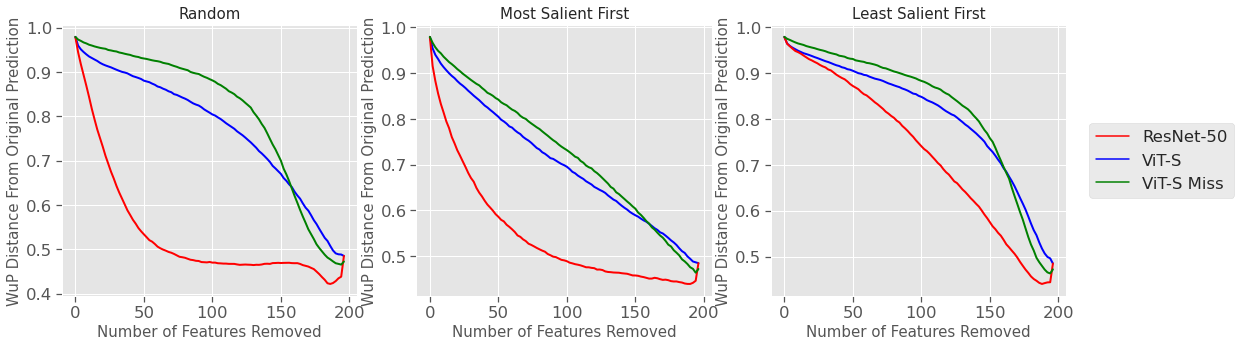

In [37]:
patch_plots(wordnet_scores,
            'Number of Features Removed', 
            'WuP Distance From Original Prediction',
             os.path.join(out_dir, "wordnet.pdf"))

99 99
99 99
99 99
99 99
99 99
99 99
99 99
99 99
99 99


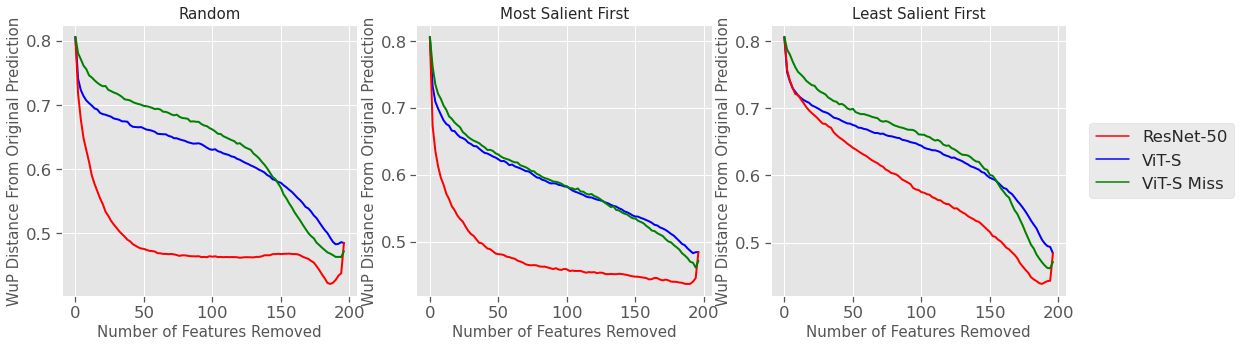

In [38]:
patch_plots(wordnet_scores_inc, 
            'Number of Features Removed', 
            'WuP Distance From Original Prediction',
            os.path.join(out_dir, "wordnet_if_incorrect.pdf"))

In [36]:
import ds_utils

ModuleNotFoundError: No module named 'ds_utils'